Imports `pandas` library to load data, `numpy` for built-in math functions, and `matplotlib` to make scatterplots

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loads data from file into pandas DataFrame

In [5]:
data = pd.read_csv("intrusion.csv")

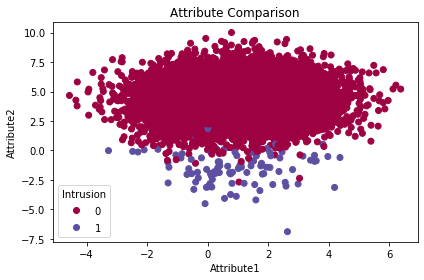

In [65]:
fig, axs = plt.subplots()
axs.set_title("Attribute1 vs Attribute2 (colored by 'Intrusion')")
scatter = axs.scatter(data["Attribute1"], data["Attribute2"], c=data["Intrusion"], cmap='Spectral')
axs.set(xlabel='Attribute1', ylabel='Attribute2')
axs.legend(*scatter.legend_elements(num=1), title="Intrusion")
fig.tight_layout()

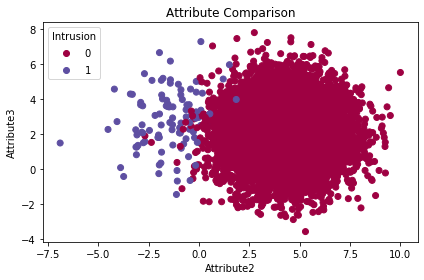

In [66]:
fig, axs = plt.subplots()
axs.set_title("Attribute Comparison")
scatter = axs.scatter(data["Attribute2"], data["Attribute3"], c=data["Intrusion"], cmap='Spectral')
axs.set(xlabel='Attribute2', ylabel='Attribute3')
axs.legend(*scatter.legend_elements(num=1), title="Intrusion")
fig.tight_layout()

Imports 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data.drop('Intrusion', axis = 1)
y = data['Intrusion']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Note: `Positive` means `Intrusion 1` and `Negative` mean `Intrusion 0`

In [54]:
def test_model(model_name: str, model):
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_fit)
    print(f"{model_name} Model Results")
    print('-----------------------------------------------------')
    print(f"Model score:     {model.score(X_test, y_test)}")
    print(f'True positive:   {cfm[1][1]}')
    print(f'False positive:  {cfm[0][1]}')
    print(f'True negative:   {cfm[0][0]}')
    print(f'False negative:  {cfm[1][0]}')
    print(f"\n{model_name} Classification Report")
    print('-----------------------------------------------------')
    print(metrics.classification_report(y_test, y_fit))

In [56]:
poly_model = SVC(kernel='poly', C=100000)
test_model("Poly", poly_model)

Poly Model Results
-----------------------------------------------------
Model score:     0.999009900990099
True positive:   15
False positive:  0
True negative:   2003
False negative:  2

Poly Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       1.00      0.88      0.94        17

    accuracy                           1.00      2020
   macro avg       1.00      0.94      0.97      2020
weighted avg       1.00      1.00      1.00      2020



In [57]:
linear_model = SVC(kernel='linear', C=100000)
test_model("Linear", linear_model)

Linear Model Results
-----------------------------------------------------
Model score:     0.9985148514851485
True positive:   15
False positive:  1
True negative:   2002
False negative:  2

Linear Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       0.94      0.88      0.91        17

    accuracy                           1.00      2020
   macro avg       0.97      0.94      0.95      2020
weighted avg       1.00      1.00      1.00      2020



In [55]:
rbf_model = SVC(kernel='rbf', C=100000)
test_model("RBF", rbf_model)

RBF Model Results
-----------------------------------------------------
Model score:     0.996039603960396
True positive:   13
False positive:  4
True negative:   1999
False negative:  4

RBF Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       0.76      0.76      0.76        17

    accuracy                           1.00      2020
   macro avg       0.88      0.88      0.88      2020
weighted avg       1.00      1.00      1.00      2020



In [58]:
rfc_model = RandomForestClassifier(n_estimators=1000)
test_model("Random Forest Classifier", rfc_model)

Random Forest Classifier Model Results
-----------------------------------------------------
Model score:     0.9985148514851485
True positive:   16
False positive:  2
True negative:   2001
False negative:  1

Random Forest Classifier Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       0.89      0.94      0.91        17

    accuracy                           1.00      2020
   macro avg       0.94      0.97      0.96      2020
weighted avg       1.00      1.00      1.00      2020

